In [14]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from RadarLidarWindSpeed import RadarLidarWindSpeed
from matplotlib.colors import ListedColormap

In [15]:
dateBegin = datetime(2020, 1, 3)
dateEnd = datetime(2020, 1, 5)

In [16]:
analysis = RadarLidarWindSpeed(dateBegin, dateEnd)
analysis.importDataset()
analysis.calculateFusion()
analysis.calculateDifferences()
analysis.calculateAvailability()

In [19]:
df = analysis.dataframe
df.reset_index(level=0, inplace=True)

In [20]:
radar = df.pivot(index="height", columns="time", values="speedRadar")
lidar = df.pivot(index="height", columns="time", values="speedLidar")
diff = df.pivot(index="height", columns="time", values="speedDifference")
fusion = df.pivot(index="height", columns="time", values="Fusion")
availability = df.pivot(index="height", columns="time", values="availability")

In [21]:

X,Y = np.meshgrid(analysis.hours, analysis.heightGrid)


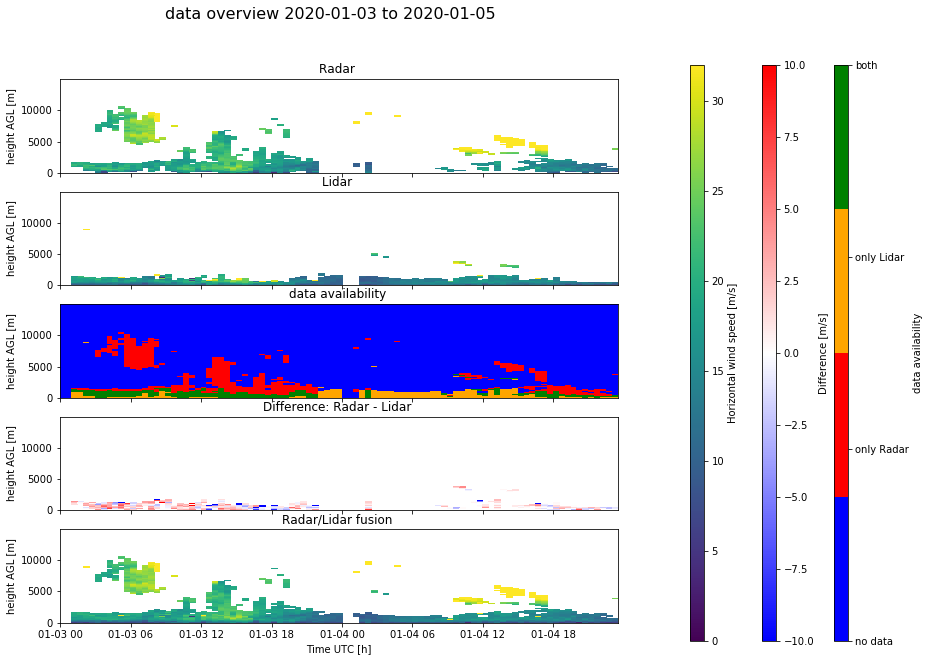

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10), sharex=True, sharey=False)

fig.suptitle("data overview "+dateBegin.strftime("%Y-%m-%d")+" to "+dateEnd.strftime("%Y-%m-%d"), fontsize=16)
# Radar
axes[0].set_title("Radar ")
im = axes[0].pcolor(X,Y,radar,cmap='viridis', vmin=0, vmax=32)
axes[0].set_ylabel("height AGL [m]")

# Lidar
axes[1].set_title("Lidar ")
im = axes[1].pcolor(X,Y,lidar,cmap='viridis', vmin=0, vmax=32)
axes[1].set_ylabel("height AGL [m]")

# Availability
col_dict={1:"blue", 2:"red", 13:"orange", 7:"green"}
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
im2 = axes[2].pcolor(X,Y,availability,cmap=cm, vmin=0, vmax=3)
axes[2].set_title("data availability ")
axes[2].set_ylabel("height AGL [m]")

# Difference
im3 = axes[3].pcolor(X,Y,diff,cmap='bwr', vmin=-10, vmax=10)
axes[3].set_title("Difference: Radar - Lidar ")
axes[3].set_ylabel("height AGL [m]")

# Fusion
im = axes[4].pcolor(X,Y,fusion,cmap='viridis', vmin=0, vmax=32)
axes[4].set_title("Radar/Lidar fusion ")
axes[4].set_xlabel("Time UTC [h]")
axes[4].set_ylabel("height AGL [m]")

# cbar speed
cb_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('Horizontal wind speed [m/s]')

# cbar difference
cb_ax3 = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar3 = fig.colorbar(im3, cax=cb_ax3)
cbar3.set_label('Difference [m/s]')

# cbar availability
cb_ax2 = fig.add_axes([1.2, 0.1, 0.02, 0.8])
cbar2 = fig.colorbar(im2, cax=cb_ax2, ticks=[0,1,2,3])
cbar2.set_ticks([0,1,2,3])
cbar2.set_ticklabels(["no data", "only Radar", "only Lidar","both"])
cbar2.set_label('data availability')

plt.show()